In [12]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
# Load dataset
df = pd.read_csv("Crop_recommendation.csv")

# Display first few rows
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [14]:
# Check dataset info
df.info()

# Check for missing values
print(df.isnull().sum())

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


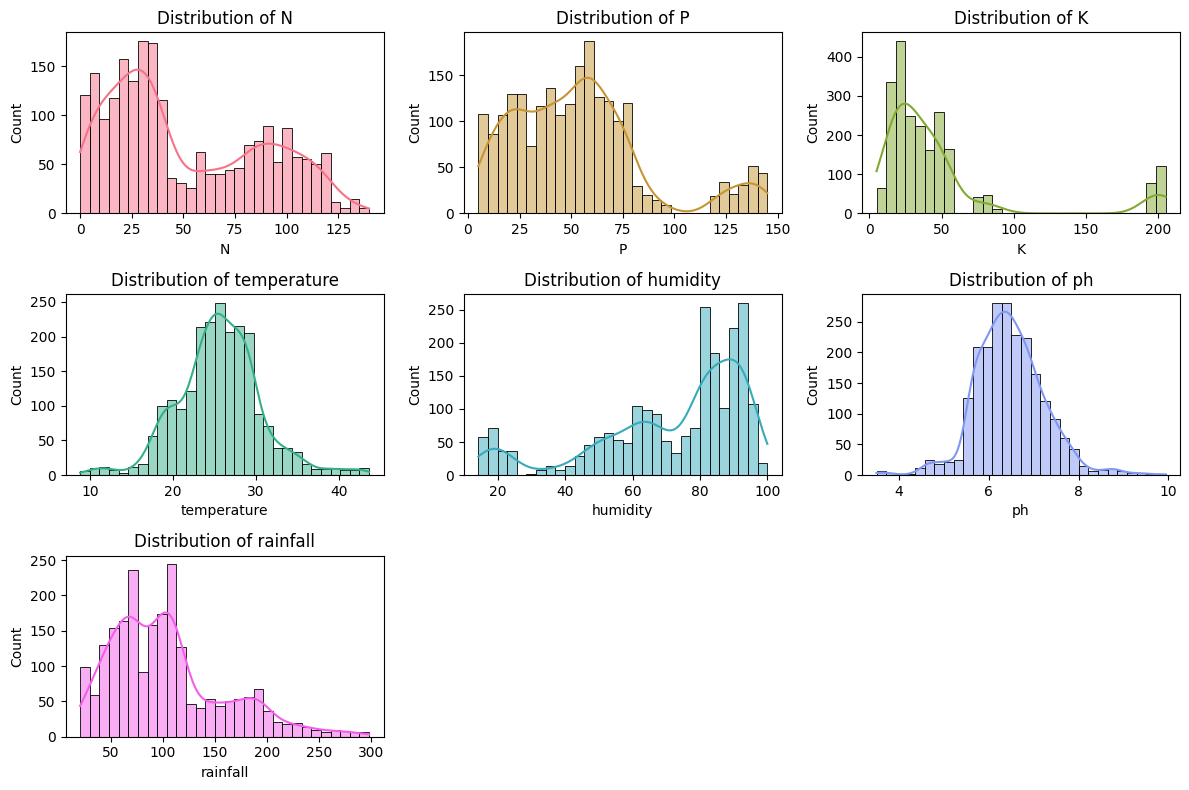

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
colors = sns.color_palette("husl", len(features))  # Generates different colors

# Create subplots
plt.figure(figsize=(12, 8))
for i, (col, color) in enumerate(zip(features, colors)):  # Assign colors to each plot
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color=color, edgecolor='black')  
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [16]:
# Encode categorical crop labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Get the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


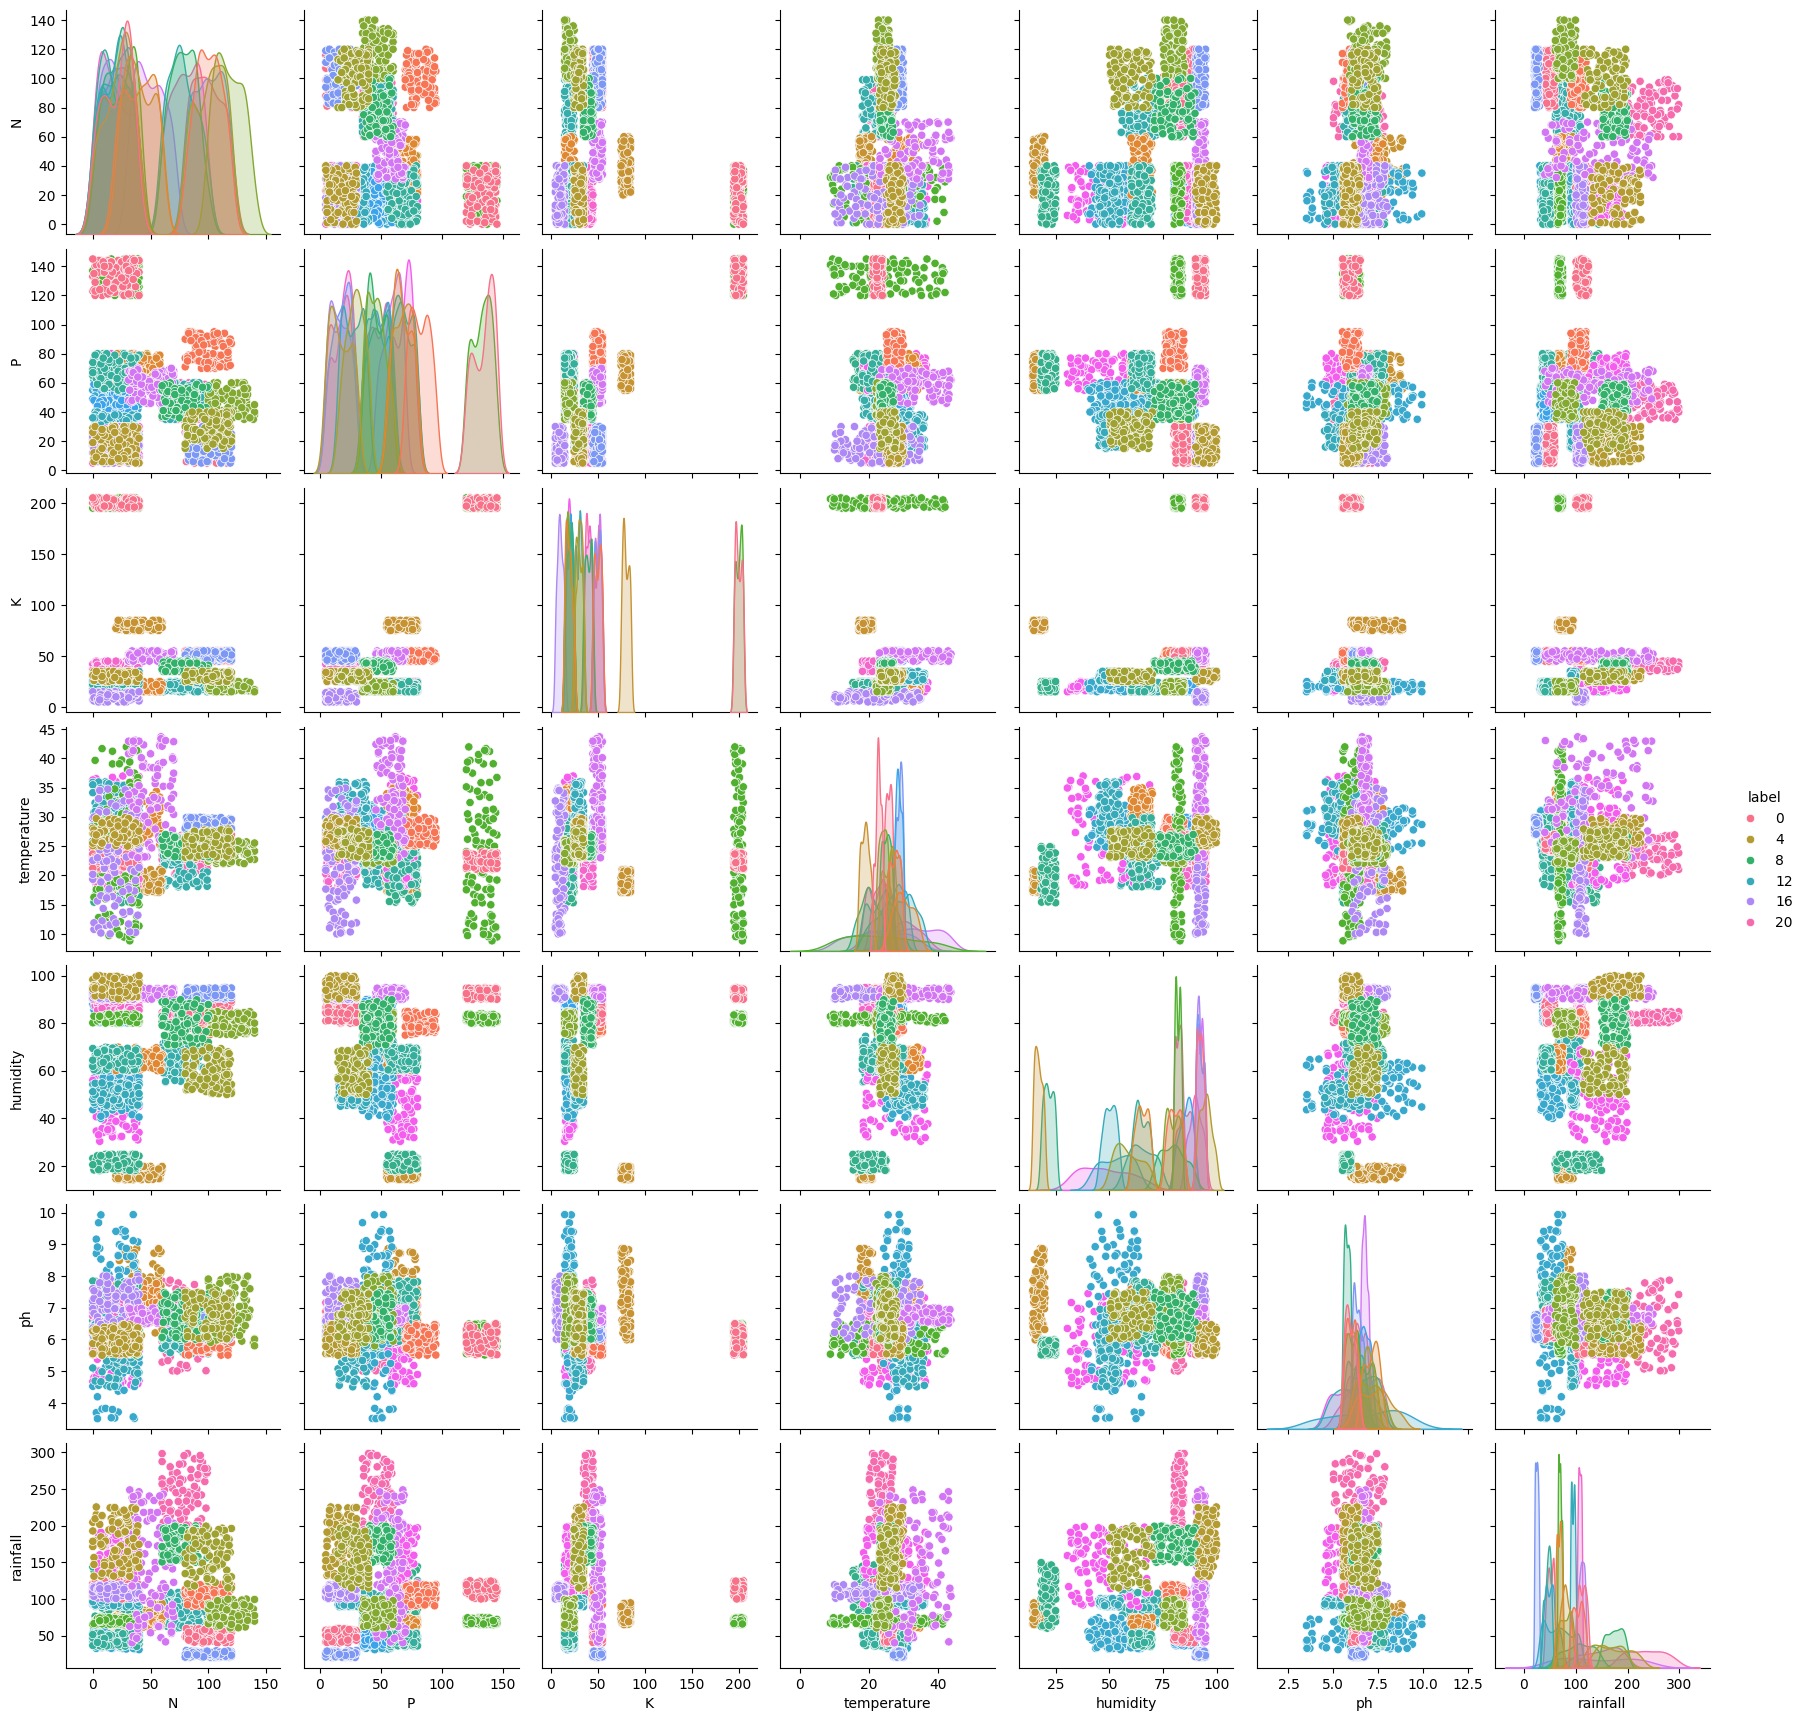

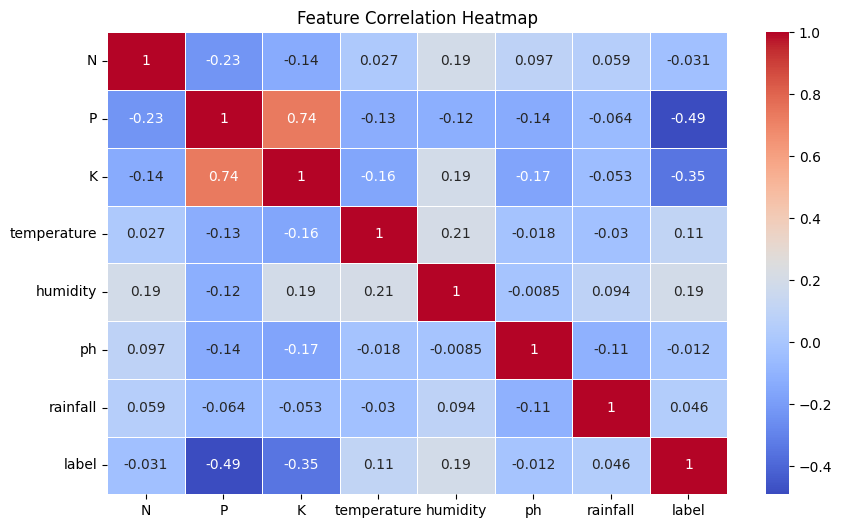

In [17]:
# Pairplot for relationships
sns.pairplot(df, hue="label", palette="husl")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [18]:
# Define features and target
X = df.drop(columns=['label'])
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Model Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00   

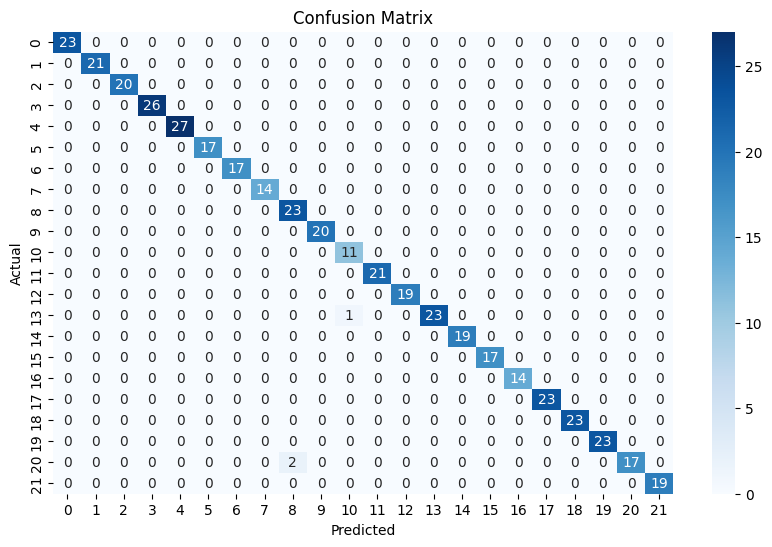

In [20]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import numpy as np

# Function to take user input safely and predict the crop
def get_valid_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("❌ Invalid input! Please enter a number.")

def predict_crop():
    print("\n🌱 Enter the following details:")
    
    N = get_valid_input("Nitrogen (N) level: ")
    P = get_valid_input("Phosphorus (P) level: ")
    K = get_valid_input("Potassium (K) level: ")
    temperature = get_valid_input("Temperature (°C): ")
    humidity = get_valid_input("Humidity (%): ")
    ph = get_valid_input("pH value: ")
    rainfall = get_valid_input("Rainfall (mm): ")

    # Create a numpy array from user input
    new_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    try:
        # Predict crop
        predicted_label = model.predict(new_data)
        predicted_crop = label_encoder.inverse_transform(predicted_label)
        print("\n✅ Recommended Crop:", predicted_crop[0])
    except Exception as e:
        print("\n❌ Prediction failed! Error:", str(e))

# Call the function
predict_crop()


🌱 Enter the following details:


Nitrogen (N) level:  str


❌ Invalid input! Please enter a number.
